# Worksheet 9: Solutions

## Twitter Data Extraction
** Q1 **  
The L16 Twitter Notebook contains code to generate a time-series plot of wind-speed for the `@dublinbaybuoy` tweet data. Write code to produce an equivalent plot for the `@FastnetLHouse` data. The main challenge in this exercise is that the Tweets from the Fastnet account are in a slightly different format. So the main changes will be to the data extraction code. 

In [8]:
FN_tweets = api.user_timeline(screen_name = '@FastnetLHouse',tweet_mode='extended',count=100)
print(FN_tweets[0].full_text)

Avg Wind:11kts, Gust:14kts, Wind Dir:86 °(E), Gust Dir:105 °(E) at 03/03/2018 15:08:00


In [9]:
buoy_tweets = api.user_timeline(screen_name = '@dublinbaybuoy',tweet_mode='extended',count=100)
print(buoy_tweets[0].full_text)

RT @DublinBayBuoy: Service update: 01/03/2018 The Dublin Bay Buoy Met Service is experiencing a technical issue which we are working to res…


In [10]:
# To get these keys & tokens go to https://apps.twitter.com and Create an App.
# Then paste your keys, secrets and tokens here. 
# These are not real keys
consumer_key = 'VeluQNXXXXXXXXXlxVIpr2SO'
consumer_secret = 'IMXNL3Elwcc2COK9bCQBGCRFk3KEXXXXXXXXXXXXX'
access_token = '39244841-Z4UTFbEYhbDTAHjpM8R20JhDo1neljGXXXXXXXXXXXXXXXX'
access_token_secret = 'fE6v2SpdRFPu5Czfd6zRBEiftWtL57TXXXXXXXXXXXXXX'

In [11]:
# Correct keys are read from a file and the dummy keys above are overwritten.
# Keys are loaded into a Pandas 'cos it is easy to do file I/O with Pandas
import pandas as pd
T_keys = pd.read_csv(open('TwitterKeys.txt'),index_col="Key")
consumer_key = T_keys.loc['consumer_key','String']
consumer_secret = T_keys.loc['consumer_secret','String']
access_token = T_keys.loc['access_token','String']
access_token_secret = T_keys.loc['access_token_secret','String']

In [12]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [13]:
len(FN_tweets[0].full_text)

86

In [14]:
FN_tweets[0].full_text.split('Wind:')[1]

'11kts, Gust:14kts, Wind Dir:86 °(E), Gust Dir:105 °(E) at 03/03/2018 15:08:00'

In [15]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline

def w_tweet_ext(tw):
    ws = int(tw.full_text.split('Avg Wind:')[1].split('kts')[0])
    t = tw.full_text.split(') at ')[1]
    return t, ws

tlist = []
w = []
d = []
for t in FN_tweets:
    if len(t.full_text) > 70:    #dealing with the occasional non-standard tweet.
        tlist.append(t.full_text)
        dtemp, wtemp = w_tweet_ext(t)  
        d.append(datetime.strptime(dtemp, '%d/%m/%Y %H:%M:%S'))   #30/12/2017 18:29:00'
        w.append(wtemp)

In [16]:
FNDf = pd.DataFrame(tlist,columns = ['Text'])
FNDf['Wind']=w
FNDf['Date/Time']=d
FNDf.head()

,Text,Wind,Date/Time
0,"Avg Wind:11kts, Gust:14kts, Wind Dir:86 °(E), ...",11,2018-03-03 15:08:00
1,"Avg Wind:9kts, Gust:12kts, Wind Dir:77 °(E), G...",9,2018-03-03 14:50:00
2,"Avg Wind:10kts, Gust:13kts, Wind Dir:43 °(NE),...",10,2018-03-03 14:26:00
3,"Avg Wind:12kts, Gust:16kts, Wind Dir:54 °(NE),...",12,2018-03-03 14:08:00
4,"Avg Wind:15kts, Gust:18kts, Wind Dir:42 °(NE),...",15,2018-03-03 13:50:00


Date/Time
count                     100
unique                    100
top       2018-03-02 19:44:00
freq                        1
first     2018-03-02 07:44:00
last      2018-03-03 15:08:00
Name: Date/Time, dtype: object


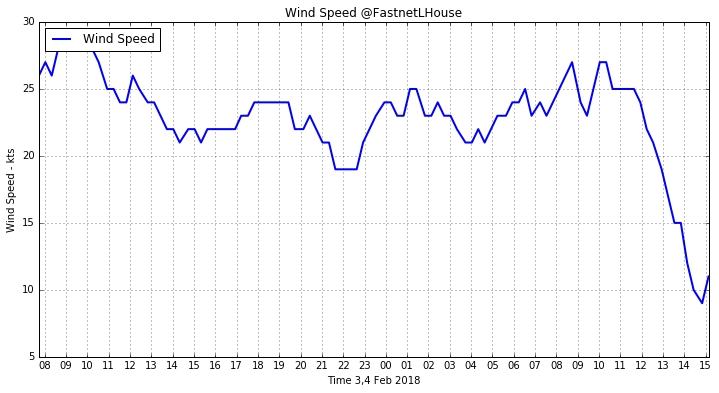

In [17]:
print("Date/Time")
print(FNDf["Date/Time"].describe())

fig = plt.figure()
ax = fig.add_subplot(111)
hour = dates.HourLocator()
dfmt = dates.DateFormatter('%H')

ax.xaxis.set_major_locator(hour)
ax.xaxis.set_minor_locator(hour)


ax.xaxis.set_major_formatter(dfmt)

ax.grid()
ax.set_ylabel('Wind Speed - kts')
ax.set_xlabel('Time 3,4 Feb 2018')
ax.set_title('Wind Speed @FastnetLHouse')
ax.plot(FNDf["Date/Time"],FNDf["Wind"], linewidth=2, label ='Wind Speed')
ax.legend(loc='upper left')
fig.set_figwidth(12)
fig.set_figheight(6)

** Q2 **  
Extend your solution for Q2 so that it plots the Gust data which is also available in the Fastnet tweets.

In [18]:
FN_tweets[0].full_text

'Avg Wind:11kts, Gust:14kts, Wind Dir:86 °(E), Gust Dir:105 °(E) at 03/03/2018 15:08:00'

In [19]:
gs = int(FN_tweets[0].full_text.split('Gust:')[1].split('kts')[0])
gs

14

In [20]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline

def w_tweet_ext(tw):
    ws = int(tw.full_text.split('Avg Wind:')[1].split('kts')[0])
    t = tw.full_text.split(') at ')[1]
    gs = int(tw.full_text.split('Gust:')[1].split('kts')[0])
    return t, ws, gs

tlist = []
w = []
d = []
g = []
for t in FN_tweets:
    if len(t.full_text) > 70:    #dealing with the occasional non-standard tweet.
        dtemp, wtemp, gtemp = w_tweet_ext(t)  
        tlist.append(t.full_text)
        d.append(datetime.strptime(dtemp, '%d/%m/%Y %H:%M:%S'))   #30/12/2017 18:29:00'
        w.append(wtemp)
        g.append(gtemp)

In [21]:
FNDf = pd.DataFrame(tlist,columns = ['Text'])
FNDf['Wind']=w
FNDf['Date/Time']=d
FNDf['Gust']=g
FNDf.head()

,Text,Wind,Date/Time,Gust
0,"Avg Wind:11kts, Gust:14kts, Wind Dir:86 °(E), ...",11,2018-03-03 15:08:00,14
1,"Avg Wind:9kts, Gust:12kts, Wind Dir:77 °(E), G...",9,2018-03-03 14:50:00,12
2,"Avg Wind:10kts, Gust:13kts, Wind Dir:43 °(NE),...",10,2018-03-03 14:26:00,13
3,"Avg Wind:12kts, Gust:16kts, Wind Dir:54 °(NE),...",12,2018-03-03 14:08:00,16
4,"Avg Wind:15kts, Gust:18kts, Wind Dir:42 °(NE),...",15,2018-03-03 13:50:00,18


In [48]:
d[0]

datetime.datetime(2018, 3, 3, 15, 8)

Date/Time
count                     100
unique                    100
top       2018-03-02 19:44:00
freq                        1
first     2018-03-02 07:44:00
last      2018-03-03 15:08:00
Name: Date/Time, dtype: object
Wind
count    100.000000
mean      22.780000
std        3.560672
min        9.000000
25%       22.000000
50%       23.000000
75%       25.000000
max       28.000000
Name: Wind, dtype: float64


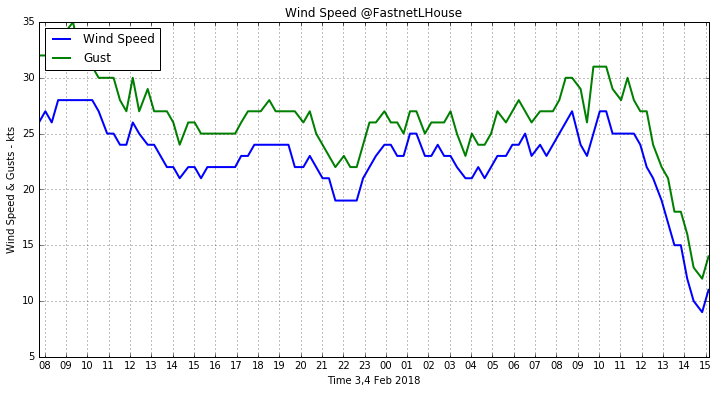

In [51]:
print("Date/Time")
print(FNDf["Date/Time"].describe())
print("Wind")
print(FNDf["Wind"].describe())


fig = plt.figure()
ax = fig.add_subplot(111)
hour = dates.HourLocator()
dfmt = dates.DateFormatter('%H')

ax.xaxis.set_major_locator(hour)
ax.xaxis.set_minor_locator(hour)


ax.xaxis.set_major_formatter(dfmt)

ax.grid()
ax.set_ylabel('Wind Speed & Gusts - kts')
ax.set_xlabel('Time 3,4 Feb 2018')
ax.set_title('Wind Speed @FastnetLHouse')
ax.plot(FNDf["Date/Time"],FNDf["Wind"], linewidth=2, label ='Wind Speed')
ax.plot(FNDf["Date/Time"],FNDf["Gust"], linewidth=2, label ='Gust')
ax.legend(loc='upper left')
fig.set_figwidth(12)
fig.set_figheight(6)

### Question 3   
Write code to build a data frame with the word frequencies of the corpus at the bottom of the L17 Notebook.  
The code should return a dataframe of words with frequencies greater than 2 and return this dataframe sorted in descending order. 

In [25]:
potus44 = ["I'm still asking you to believe - not in my ability to bring about change, but in yours. \
I believe in change because I believe in you.",
 'As we look forward, I want our first steps to reflect what matters most to you. Share your thoughts \
 with me at https://t.co/fGUxlpLVue.',
 "I won't stop; I'll be right there with you as a citizen, inspired by your voices of truth and justice, \
 good humor, and love.",
 "It's been the honor of my life to serve you. You made me a better leader and a better man.",
 'Proud to make this one of my final actions as President. America is a nation of second chances, \
 and 1,715 people deserved that shot. https://t.co/4hPxG7hqHL',
 'RT @FLOTUS: Being your First Lady has been the honor of a lifetime. From the bottom of my heart, \
 thank you. -mo https://t.co/pahEydkZ5Z',
 "To the girl from the South Side who took on a role she didn't ask for and made it her own: \
 Happy Birthday, Michelle. I love you. https://t.co/lvjfx418hn",
 'From one 44 to another, thanks for finally giving @FLOTUS and generations of hopeful fans a \
 @Cubs championship. https://t.co/RnLyTYF2ub',
 'In honor of their legacy, @FLOTUS and I are joining Americans across the country in a day of service \
 to our community here in D.C. #MLKDay',
 'Dr. King and those who marched with him proved that people who love their country can change it. \
 As Americans, we all owe them a great deal.']

In [26]:
potusL = ''
for e in potus44:
    potusL += e
from textblob import TextBlob as tb
potusTB = tb(potusL)

In [27]:
potusTB

TextBlob("I'm still asking you to believe - not in my ability to bring about change, but in yours. I believe in change because I believe in you.As we look forward, I want our first steps to reflect what matters most to you. Share your thoughts  with me at https://t.co/fGUxlpLVue.I won't stop; I'll be right there with you as a citizen, inspired by your voices of truth and justice,  good humor, and love.It's been the honor of my life to serve you. You made me a better leader and a better man.Proud to make this one of my final actions as President. America is a nation of second chances,  and 1,715 people deserved that shot. https://t.co/4hPxG7hqHLRT @FLOTUS: Being your First Lady has been the honor of a lifetime. From the bottom of my heart,  thank you. -mo https://t.co/pahEydkZ5ZTo the girl from the South Side who took on a role she didn't ask for and made it her own:  Happy Birthday, Michelle. I love you. https://t.co/lvjfx418hnFrom one 44 to another, thanks for finally giving @FLOTUS a

In [28]:
stop_words = set(['the', 'and','or', 'a', 'is', 'as','https','amp','at','if',\
                  'with', 'in', 'of','on','to','for','from','it','by','st'])
# vocab is a set (no duplicates) of lowercase words with stop words removed
vocab = set(potusTB.words.lower()) - stop_words
# vocabDF is a DataFrame indexed by the vocab
vocabDF = pd.DataFrame(index = list(vocab))
for w in vocab:
    # Note the count method defaults to not case sensitive
    vocabDF.loc[w,'Count'] = potusTB.words.count(w) # Include count in DataFrame

In [29]:
# Select entries with a count > 1 and sort.
vocabDF[vocabDF['Count']>2].sort_values(by='Count',ascending=False)

,Count
i,7.0
you,7.0
my,4.0
honor,3.0
your,3.0
change,3.0
flotus,3.0
who,3.0
believe,3.0


### Question 4  
Extend the code in Q1 to work with the last 20 tweets for a given Twitter handle.


In [30]:
L_tweets = api.user_timeline(screen_name = '@campaignforleo',tweet_mode='extended',count=20)

TL =''

for t in L_tweets:
    TL += t.full_text
    
from textblob import TextBlob as tb
TTB = tb(TL)
    
# vocab is a set (no duplicates) of lowercase words with stop words removed
vocab = set(TTB.words.lower()) - stop_words
# vocabDF is a DataFrame indexed by the vocab
vocabDF = pd.DataFrame(index = list(vocab))
for w in vocab:
    # Note the count method defaults to not case sensitive
    vocabDF.loc[w,'Count'] = TTB.words.count(w) # Include count in DataFrame

In [31]:
# Select entries with a count > 1 and sort.
vocabDF[vocabDF['Count']>2].sort_values(by='Count',ascending=False)

,Count
weather,8.0
conditions,7.0
warning,6.0
been,5.0
now,5.0
working,4.0
are,4.0
has,4.0
stay,3.0
thanks,3.0


** Supp Question **
3rd March 2018: @dublinbaybuoy is out of action at the moment so this is an alternative

In [70]:
athenry_tweets = api.user_timeline(screen_name = '@athenryweather',count=100)
print(athenry_tweets[25].text)

Rainfall  1.5 mm/h Temperature 1C Windspeed 17 kts  Pressure 993 hPa  Source: Met Eireann


In [71]:
tlist = []
for t in athenry_tweets:
    tlist.append(t.text)
atDf = pd.DataFrame(tlist,columns = ['Text'])
atDf.head()

,Text
0,Rainfall 0.0 mm/h Temperature 2C Windspeed 13...
1,Rainfall 0.0 mm/h Temperature 2C Windspeed 16...
2,Rainfall 0.0 mm/h Temperature 1C Windspeed 13...
3,Rainfall 0.0 mm/h Temperature 1C Windspeed 16...
4,Rainfall 0.0 mm/h Temperature 1C Windspeed 17...


In [72]:
temp_arr = []
date_arr = []
for tweet in athenry_tweets:
#    time_arr.append(tweet.created_at.__format__('%Y-%m-%d'))
    date_arr.append(tweet.created_at)
    temp_arr.append(int(tweet.text.split('Temperature ')[1].split('C')[0]))
print(temp_arr)
print(date_arr[0])

[2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2, -2, -3, -3, -4, -4, -5, -5, -5, -5, -5, -5, -5, -4, -5, -4, -4, -3, -3, -3, -2, -1, -1, -1, -2, -1, 0, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -1, 0, 0, 1, 3, 4, 5, 4, 5, 3, 2, 0, -2, -3]
2018-03-03 14:05:18


In [73]:
date_arr[0]
# From above: datetime.datetime(2018, 3, 3, 15, 8)

datetime.datetime(2018, 3, 3, 14, 5, 18)

In [74]:
atDf['Temperature']=temp_arr
atDf['Date/Time']=date_arr
atDf.head()

,Text,Temperature,Date/Time
0,Rainfall 0.0 mm/h Temperature 2C Windspeed 13...,2,2018-03-03 14:05:18
1,Rainfall 0.0 mm/h Temperature 2C Windspeed 16...,2,2018-03-03 13:05:18
2,Rainfall 0.0 mm/h Temperature 1C Windspeed 13...,1,2018-03-03 12:05:18
3,Rainfall 0.0 mm/h Temperature 1C Windspeed 16...,1,2018-03-03 11:05:18
4,Rainfall 0.0 mm/h Temperature 1C Windspeed 17...,1,2018-03-03 10:05:19


Date/Time
count                     100
unique                    100
top       2018-02-28 20:05:18
freq                        1
first     2018-02-27 08:05:18
last      2018-03-03 14:05:18
Name: Date/Time, dtype: object
Temperature
count    100.000000
mean      -0.980000
std        2.229191
min       -5.000000
25%       -2.250000
50%       -1.000000
75%        0.000000
max        5.000000
Name: Temperature, dtype: float64


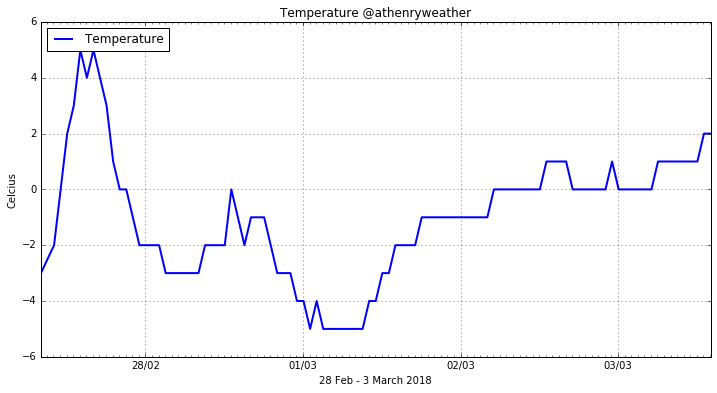

In [80]:
print("Date/Time")
print(atDf["Date/Time"].describe())
print("Temperature")
print(atDf["Temperature"].describe())

#plt.rcdefaults()
#'%d/%m/%Y %H:%M:%S'

fig = plt.figure()
ax = fig.add_subplot(111)
hour = dates.HourLocator()
day = dates.DayLocator()
dfmt = dates.DateFormatter('%d/%m')

ax.xaxis.set_major_locator(day)
ax.xaxis.set_minor_locator(hour)
ax.xaxis.set_major_formatter(dfmt)

ax.grid()
ax.set_ylabel('Celcius')
ax.set_xlabel('28 Feb - 3 March 2018')
ax.set_title('Temperature @athenryweather')
ax.plot(atDf["Date/Time"],atDf["Temperature"], linewidth=2, label ='Temperature')
ax.legend(loc='upper left')
fig.set_figwidth(12)
fig.set_figheight(6)

In [37]:
athenry_tweets[0].created_at

datetime.datetime(2018, 3, 3, 14, 5, 18)

In [36]:
dir(athenry_tweets[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']